# Quiz2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.transform import *

In [2]:
digits = datasets.load_digits()

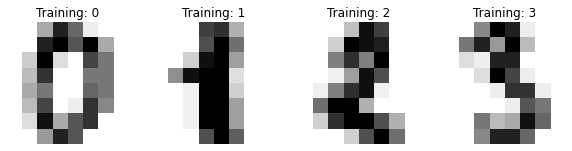

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
n_samples = len(digits.images)
img = digits.images.reshape((n_samples, -1))
img.shape

(1797, 64)

In [8]:
def model(data):
    xtrain, x_test, ytrain, y_test = train_test_split(
        data, digits.target, test_size=0.15, stratify=digits.target
    )

    x_train, x_dev, y_train, y_dev = train_test_split(
        xtrain, ytrain, test_size=0.2, stratify=ytrain
    )

    gamma = [1e-3, 1e-5, 1e-6, 1e-4, 1e-7]
    C = [4,6,10,12]
    list = [gamma,C]
    combinations = [p for p in itertools.product(*list)]
    params,train_acc,dev_acc,test_acc=[],[],[],[]
    for gamma,c in combinations:
        params.append((gamma,c))
        svmc = svm.SVC( kernel='rbf',gamma=gamma,C=c)
        svmc.fit(x_train, y_train)
        train_acc.append(accuracy_score(y_train,svmc.predict(x_train)))
        dev_acc.append(accuracy_score(y_dev,svmc.predict(x_dev)))
        test_acc.append(accuracy_score(y_test,svmc.predict(x_test)))

    results = pd.DataFrame({'hyper_params':params,'train_accuracy':train_acc,'dev_accuracy':dev_acc,'test_accuracy':test_acc})

    return results, (results[results['dev_accuracy']==max(results['dev_accuracy'])])
 

In [9]:
result, best = model(img)

In [11]:
result.head(10)

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.000000,0.990196,0.985185
1,"(0.001, 6)",1.000000,0.990196,0.985185
2,"(0.001, 10)",1.000000,0.990196,0.985185
3,"(0.001, 12)",1.000000,0.990196,0.985185
4,"(1e-05, 4)",0.957412,0.947712,0.940741
5,"(1e-05, 6)",0.967240,0.960784,0.955556
6,"(1e-05, 10)",0.975430,0.970588,0.966667
7,"(1e-05, 12)",0.981163,0.973856,0.970370
8,"(1e-06, 4)",0.670762,0.656863,0.670370
9,"(1e-06, 6)",0.769861,0.774510,0.762963


In [12]:
def minimum(x,y,z):
    return min([x,y,z])

def maximum(x,y,z):
    return max([x,y,z])

def mean(x,y,z):
    return sum([x,y,z])/3


In [14]:
result['minimum'] = result.apply(lambda x: minimum(x.train_accuracy, x.dev_accuracy,x.test_accuracy), axis=1)

In [15]:
result['maximum'] = result.apply(lambda x: maximum(x.train_accuracy, x.dev_accuracy,x.test_accuracy), axis=1)

In [16]:
result['mean'] = result.apply(lambda x: mean(x.train_accuracy, x.dev_accuracy,x.test_accuracy), axis=1)

In [20]:
result.head(10)

,hyper_params,train_accuracy,dev_accuracy,test_accuracy,minimum,maximum,mean
0,"(0.001, 4)",1.000000,0.990196,0.985185,0.985185,1.000000,0.991794
1,"(0.001, 6)",1.000000,0.990196,0.985185,0.985185,1.000000,0.991794
2,"(0.001, 10)",1.000000,0.990196,0.985185,0.985185,1.000000,0.991794
3,"(0.001, 12)",1.000000,0.990196,0.985185,0.985185,1.000000,0.991794
4,"(1e-05, 4)",0.957412,0.947712,0.940741,0.940741,0.957412,0.948622
5,"(1e-05, 6)",0.967240,0.960784,0.955556,0.955556,0.967240,0.961193
6,"(1e-05, 10)",0.975430,0.970588,0.966667,0.966667,0.975430,0.970895
7,"(1e-05, 12)",0.981163,0.973856,0.970370,0.970370,0.981163,0.975130
8,"(1e-06, 4)",0.670762,0.656863,0.670370,0.656863,0.670762,0.665998
9,"(1e-06, 6)",0.769861,0.774510,0.762963,0.762963,0.774510,0.769111


In [23]:
best.head(1)

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.0,0.990196,0.985185


# Change in split ratio

In [22]:
def model(data):
    xtrain, x_test, ytrain, y_test = train_test_split(
        data, digits.target, test_size=0.15, stratify=digits.target
    )

    x_train, x_dev, y_train, y_dev = train_test_split(
        xtrain, ytrain, test_size=0.3, stratify=ytrain
    )

    gamma = [1e-3, 1e-5, 1e-6, 1e-4, 1e-7]
    C = [4,6,10,12]
    list = [gamma,C]
    combinations = [p for p in itertools.product(*list)]
    params,train_acc,dev_acc,test_acc=[],[],[],[]
    for gamma,c in combinations:
        params.append((gamma,c))
        svmc = svm.SVC( kernel='rbf',gamma=gamma,C=c)
        svmc.fit(x_train, y_train)
        train_acc.append(accuracy_score(y_train,svmc.predict(x_train)))
        dev_acc.append(accuracy_score(y_dev,svmc.predict(x_dev)))
        test_acc.append(accuracy_score(y_test,svmc.predict(x_test)))

    results = pd.DataFrame({'hyper_params':params,'train_accuracy':train_acc,'dev_accuracy':dev_acc,'test_accuracy':test_acc})

    return results, (results[results['dev_accuracy']==max(results['dev_accuracy'])])
 

In [24]:
result2, best2 = model(img)

In [27]:
result2.head(10)

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.000000,0.995643,0.992593
1,"(0.001, 6)",1.000000,0.995643,0.992593
2,"(0.001, 10)",1.000000,0.995643,0.992593
3,"(0.001, 12)",1.000000,0.995643,0.992593
4,"(1e-05, 4)",0.956929,0.936819,0.951852
5,"(1e-05, 6)",0.964419,0.952070,0.966667
6,"(1e-05, 10)",0.970037,0.965142,0.974074
7,"(1e-05, 12)",0.972846,0.962963,0.974074
8,"(1e-06, 4)",0.644195,0.657952,0.644444
9,"(1e-06, 6)",0.751873,0.755991,0.751852


In [28]:
result2['minimum'] = result.apply(lambda x: minimum(x.train_accuracy, x.dev_accuracy,x.test_accuracy), axis=1)

In [29]:
result2['maximum'] = result.apply(lambda x: maximum(x.train_accuracy, x.dev_accuracy,x.test_accuracy), axis=1)

In [30]:
result2['mean'] = result.apply(lambda x: mean(x.train_accuracy, x.dev_accuracy,x.test_accuracy), axis=1)

In [32]:
result2.head(10)

,hyper_params,train_accuracy,dev_accuracy,test_accuracy,minimum,maximum,mean
0,"(0.001, 4)",1.000000,0.995643,0.992593,0.985185,1.000000,0.991794
1,"(0.001, 6)",1.000000,0.995643,0.992593,0.985185,1.000000,0.991794
2,"(0.001, 10)",1.000000,0.995643,0.992593,0.985185,1.000000,0.991794
3,"(0.001, 12)",1.000000,0.995643,0.992593,0.985185,1.000000,0.991794
4,"(1e-05, 4)",0.956929,0.936819,0.951852,0.940741,0.957412,0.948622
5,"(1e-05, 6)",0.964419,0.952070,0.966667,0.955556,0.967240,0.961193
6,"(1e-05, 10)",0.970037,0.965142,0.974074,0.966667,0.975430,0.970895
7,"(1e-05, 12)",0.972846,0.962963,0.974074,0.970370,0.981163,0.975130
8,"(1e-06, 4)",0.644195,0.657952,0.644444,0.656863,0.670762,0.665998
9,"(1e-06, 6)",0.751873,0.755991,0.751852,0.762963,0.774510,0.769111


In [26]:
best2

,hyper_params,train_accuracy,dev_accuracy,test_accuracy
0,"(0.001, 4)",1.0,0.995643,0.992593
1,"(0.001, 6)",1.0,0.995643,0.992593
2,"(0.001, 10)",1.0,0.995643,0.992593
3,"(0.001, 12)",1.0,0.995643,0.992593
